Graphical representation of the information allows TensorFlow to know the dependencies between transactions and assign operations to devices asynchronously, and in parallel, when these operations already have their associated tensors (edges).

## Linear Regression with Numpy

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [33]:
number_of_points = 10000

vectors_xy = []
for i in xrange(number_of_points):
    # generate a number in the normal disctribution with mean 0 and std 0.55
    xi = np.random.normal(0.0,0.55) 
    yi = 0.1*xi + (0.3 + np.random.normal(0.0, 0.03))
    vectors_xy.append([xi, yi])
    
x = [v[0] for v in vectors_xy] 
y = [v[1] for v in vectors_xy]   

We have generated a set of 10,000 x and y points forming a linear regression line such that y = Wx + b (ofcourse with some amount of error).

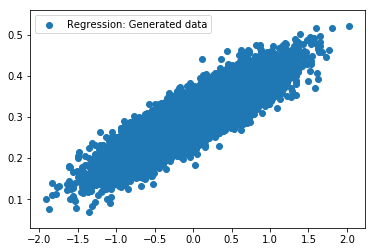

In [34]:
plt.scatter(x, y, label = "Regression: Generated data")
plt.legend()
plt.show()

We will now train a model to predict y, given the x for this dataset. The algorithm will estimate W and b from the training dataset by iterating through each value of th dataset and modiyfying the previous estimation of the two variables.

<b> Cost Function (or the error function) </b> is used to find out if the model is doing well on these estimations after every iteration. This function receives a W and b and it resurns an error value based on how well these parameters defining the regression line actually fit our data. This cost function can be a mean squared error based on each iteration.

Let us work on this logic to write a TensorFlow program:


In [35]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y_ = W*x + b

## calculating the cost/loss
loss = tf.reduce_mean(tf.square(y_-y))

<b>Gradient Descent</b> is an optimization algorithm which minimizes functions. Starting with initial parameters, it moves taking steps in the negative direction of the function gradient; towards values which reduces the function values

In [36]:
optimizer = tf.train.GradientDescentOptimizer(0.5) # learning rate of 0.5
train = optimizer.minimize(loss)

In [37]:
## Initializing tensorflow variables and running the session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

## Assuming 8 iterations to estimate W and b:
for step in xrange(8):
    sess.run(train)
    print step, sess.run(W), sess.run(b), sess.run(loss)

0 [ 0.58179325] [ 0.3021763] 0.0701436
1 [ 0.43781468] [ 0.30144173] 0.0348893
2 [ 0.33694136] [ 0.30093098] 0.0175844
3 [ 0.26626825] [ 0.30057311] 0.00909013
4 [ 0.2167538] [ 0.30032238] 0.00492067
5 [ 0.18206334] [ 0.30014673] 0.00287404
6 [ 0.15775876] [ 0.30002367] 0.00186944
7 [ 0.14073065] [ 0.29993746] 0.00137633


See how with each iteration, the loss is going down.

#### Graphically see the Trained model

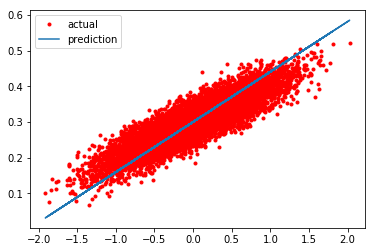

In [38]:
plt.plot(x, y, "r.", label = "actual")
plt.plot(x, sess.run(W)*x + sess.run(b), label = "prediction")
plt.legend()
plt.show()